# **Discovering and Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import heapq
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("GS.csv")
print( f"Number of sample = { df.shape[0] }" )
print( f"Number of features = { df.shape[1] }")

Number of sample = 3732
Number of features = 64


In [ ]:
print(df.head())

         Date   Open    High    Low  Close(t)   Volume      SD20  Upper_Band  \
0  2005-10-17  96.02   97.44  95.97     96.90  4296800  1.890451  101.615902   
1  2005-10-18  96.49   98.01  96.47     96.93  4139600  1.901223  101.597445   
2  2005-10-19  96.24  100.44  96.05    100.34  6704500  1.919573  101.862646   
3  2005-10-20  99.53  101.27  98.48     98.51  9035700  1.922620  101.889240   
4  2005-10-21  99.38   99.53  97.91     98.53  5417800  1.915717  101.856935   

   Lower_Band  S_Close(t-1)  ...  QQQ_MA10  QQQ_MA20  QQQ_MA50  SnP_Close  \
0   94.054098         94.83  ...    33.692   33.9970   34.2690    1190.10   
1   93.992555         96.90  ...    33.570   33.9525   34.2466    1178.14   
2   94.184354         96.93  ...    33.562   33.9600   34.2330    1195.76   
3   94.198760        100.34  ...    33.567   33.9455   34.2190    1177.80   
4   94.194065         98.51  ...    33.586   33.9365   34.2034    1179.59   

   SnP(t-1))  SnP(t-5)  DJIA_Close  DJIA(t-1))  DJIA(t-5

In [ ]:
for column in df.columns:
  if "t-" in column:
      del df[column]

df.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,MA5,...,Is_leap_year,Year,Month,QQQ_Close,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,DJIA_Close,Close_forcast
0,2005-10-17,96.02,97.44,95.97,96.90,4296800,1.890451,101.615902,94.054098,95.696,...,0,2005,10,33.65,33.692,33.9970,34.2690,1190.10,10348.10,96.93
1,2005-10-18,96.49,98.01,96.47,96.93,4139600,1.901223,101.597445,93.992555,95.620,...,0,2005,10,33.42,33.570,33.9525,34.2466,1178.14,10285.26,100.34
2,2005-10-19,96.24,100.44,96.05,100.34,6704500,1.919573,101.862646,94.184354,96.540,...,0,2005,10,34.09,33.562,33.9600,34.2330,1195.76,10414.13,98.51
3,2005-10-20,99.53,101.27,98.48,98.51,9035700,1.922620,101.889240,94.198760,97.502,...,0,2005,10,33.77,33.567,33.9455,34.2190,1177.80,10281.10,98.53
4,2005-10-21,99.38,99.53,97.91,98.53,5417800,1.915717,101.856935,94.194065,98.242,...,0,2005,10,33.98,33.586,33.9365,34.2034,1179.59,10215.22,102.29


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50',
       'SnP_Close', 'DJIA_Close', 'Close_forcast'],
      dtype='object')

In [ ]:
len(df.columns)

52

In [ ]:
L = ['Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week','Year', 'Month', 'Close_forcast'] # These are the features we chose to remove

In [ ]:
df.drop(L, axis = 1, inplace = True) #Drop the above features

In [ ]:
df.isnull().sum() #To show we have no null values

Date                0
Open                0
High                0
Low                 0
Close(t)            0
Volume              0
SD20                0
Upper_Band          0
Lower_Band          0
MA5                 0
MA10                0
MA20                0
MA50                0
MA200               0
EMA10               0
EMA20               0
EMA50               0
EMA100              0
EMA200              0
MACD                0
MACD_EMA            0
ATR                 0
ADX                 0
CCI                 0
ROC                 0
RSI                 0
William%R           0
SO%K                0
STD5                0
ForceIndex1         0
ForceIndex20        0
Is_month_end        0
Is_month_start      0
Is_quarter_end      0
Is_quarter_start    0
Is_year_end         0
Is_year_start       0
Is_leap_year        0
QQQ_Close           0
QQQ_MA10            0
QQQ_MA20            0
QQQ_MA50            0
SnP_Close           0
DJIA_Close          0
dtype: int64

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Is_leap_year', 'QQQ_Close', 'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50',
       'SnP_Close', 'DJIA_Close'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler() # scaling the data using a Minmax scaler which divides by the maximum of the column

featuresToScale = ['Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'QQQ_Close', 'QQQ_MA10', 'QQQ_MA20',
       'QQQ_MA50', 'SnP_Close', 'DJIA_Close']

df.loc[:,featuresToScale] = scaler.fit_transform(df.loc[:,featuresToScale])


In [ ]:
df.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,MA5,...,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,QQQ_Close,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,DJIA_Close
0,2005-10-17,0.231397,0.235316,0.254396,0.242427,0.033552,0.040653,0.163047,0.266132,0.225944,...,0,0,0,0,0.043197,0.039170,0.038103,0.036787,0.189536,0.165232
1,2005-10-18,0.233566,0.237940,0.256680,0.242565,0.032175,0.041054,0.162953,0.265836,0.225581,...,0,0,0,0,0.042284,0.038675,0.037918,0.036689,0.185122,0.162500
2,2005-10-19,0.232412,0.249125,0.254761,0.258239,0.054650,0.041739,0.164303,0.266760,0.229977,...,0,0,0,0,0.044944,0.038642,0.037949,0.036630,0.191625,0.168102
3,2005-10-20,0.247590,0.252946,0.265860,0.249828,0.075077,0.041852,0.164439,0.266829,0.234573,...,0,0,0,0,0.043673,0.038663,0.037889,0.036569,0.184996,0.162319
4,2005-10-21,0.246898,0.244936,0.263256,0.249920,0.043375,0.041595,0.164274,0.266807,0.238109,...,0,0,0,0,0.044507,0.038740,0.037851,0.036501,0.185657,0.159455


In [ ]:
print(type(df["Date"][0]))

<class 'str'>


In [ ]:
import datetime

def strToTime(s): # This is to change the date variable to a variable of type datetime since its easier to use
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime( year = year, month = month, day = day )

df["Date"] = df["Date"].apply(strToTime)
print(df.head())

dates = df["Date"]
df.index = df.pop("Date")#reindex the df to use date as index
close = df["Close(t)"]
print(df.head())

        Date      Open      High       Low  Close(t)    Volume      SD20  \
0 2005-10-17  0.231397  0.235316  0.254396  0.242427  0.033552  0.040653   
1 2005-10-18  0.233566  0.237940  0.256680  0.242565  0.032175  0.041054   
2 2005-10-19  0.232412  0.249125  0.254761  0.258239  0.054650  0.041739   
3 2005-10-20  0.247590  0.252946  0.265860  0.249828  0.075077  0.041852   
4 2005-10-21  0.246898  0.244936  0.263256  0.249920  0.043375  0.041595   

   Upper_Band  Lower_Band       MA5  ...  Is_quarter_start  Is_year_end  \
0    0.163047    0.266132  0.225944  ...                 0            0   
1    0.162953    0.265836  0.225581  ...                 0            0   
2    0.164303    0.266760  0.229977  ...                 0            0   
3    0.164439    0.266829  0.234573  ...                 0            0   
4    0.164274    0.266807  0.238109  ...                 0            0   

   Is_year_start  Is_leap_year  QQQ_Close  QQQ_MA10  QQQ_MA20  QQQ_MA50  \
0              0 

In [ ]:
dates #Save the dates in a list called dates

0      2005-10-17
1      2005-10-18
2      2005-10-19
3      2005-10-20
4      2005-10-21
          ...    
3727   2020-08-07
3728   2020-08-10
3729   2020-08-11
3730   2020-08-12
3731   2020-08-13
Name: Date, Length: 3732, dtype: datetime64[ns]

In [ ]:
dates = dates[4:len(dates)-3] #Resize the dates to exclude the first 4 and last 3 elements since when working, we predict T based on (T-1) and (T-2) and (T-3) This will help us later on
dates
close = close[4:len(close)-3] #Similarly as dates but, we set close as the closing price which will be the one to predict
close

Date
2005-10-21    0.249920
2005-10-24    0.267203
2005-10-25    0.268122
2005-10-26    0.270788
2005-10-27    0.263847
                ...   
2020-08-04    0.723880
2020-08-05    0.737118
2020-08-06    0.735877
2020-08-07    0.754355
2020-08-10    0.759458
Name: Close(t), Length: 3725, dtype: float64

In [ ]:
dates.index = range(len(dates))
dates

0      2005-10-21
1      2005-10-24
2      2005-10-25
3      2005-10-26
4      2005-10-27
          ...    
3720   2020-08-04
3721   2020-08-05
3722   2020-08-06
3723   2020-08-07
3724   2020-08-10
Name: Date, Length: 3725, dtype: datetime64[ns]

In [ ]:
def preprocessingHelper(df, startDate, endDate, n): #This is the function that adds the values of the last 3 days as features for LSTM to use them.
  L = [[]]
  d1 = startDate - datetime.timedelta(3)
  d2 = startDate - datetime.timedelta(2)
  d3 = startDate - datetime.timedelta(1)
  L[0].append(df.loc[d1])
  L[0].append(df.loc[d2])
  L[0].append(df.loc[d3])
  for i in range(1, n):
    L.append(L[len(L)-1][1:])
    L[len(L)-1].append(df.loc[dates[i-1]])
  return L

n = len(dates)
X = preprocessingHelper(df, dates[0], dates[n-1], n) #Get the features as a list of lists. Each list will contain 3 other lists corresponding to the data from previous 3 days
X = np.array(X)
X.shape #X will be all indicators and features

(3725, 3, 43)

In [ ]:
y = close
y.head #Set the y to be the closing price

<bound method NDFrame.head of Date
2005-10-21    0.249920
2005-10-24    0.267203
2005-10-25    0.268122
2005-10-26    0.270788
2005-10-27    0.263847
                ...   
2020-08-04    0.723880
2020-08-05    0.737118
2020-08-06    0.735877
2020-08-07    0.754355
2020-08-10    0.759458
Name: Close(t), Length: 3725, dtype: float64>

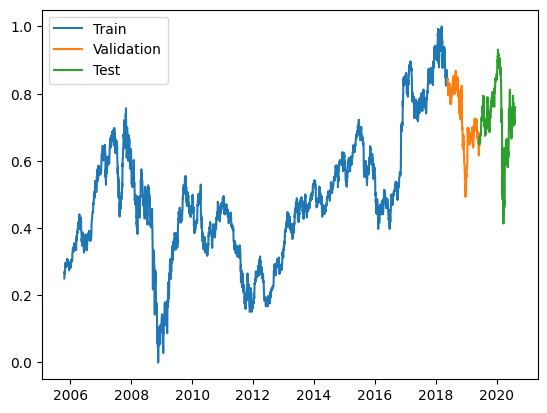

In [ ]:
q_70 = int(len(X)*0.85)
q_85 = int(len(X)*0.92)

dates_training, X_train, y_train = dates[:q_70], X[:q_70], y[:q_70] # Splitting the data into test, train and validation sets.
dates_val, X_val, y_val = dates[q_70:q_85], X[q_70:q_85], y[q_70:q_85]
dates_test, X_test, y_test = dates[q_85:], X[q_85:], y[q_85:]

plt.plot(dates_training, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(['Train', 'Validation', 'Test']) #Plot the data we have

# **Building and training the LSTM model**

In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

def create_model(units): #Performing grid search to tune hyperparameters.
      model = Sequential([layers.Input((len(X[0]), len(X[0][0]))),
                    layers.LSTM(units),
                    layers.Dense(256, activation='relu'),
                    layers.Dense(1)])
      model.compile(loss='mse',
              optimizer='adam',
              metrics=['mean_squared_error'])
      return model

model = KerasRegressor(build_fn=create_model, units = 50, epochs=50, verbose=0)

param_grid = {'units': [50, 100, 150]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)

print("Best parameters found: ", grid_result.best_params_)
#Note that we found the best hyper parameter for the number of cells in LSTM layer to be 100 using grid search.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best parameters found:  {'units': 100}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((len(X[0]), len(X[0][0]))), #Building the LSTM model with input 3 x number of features
                    layers.LSTM(100),
                    layers.Dense(256, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_squared_error'])

histroy = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100) #Fit the model in the data

Epoch 1/100
108/108 [==============================] - 4s 12ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 4.8707e-04 - val_mean_squared_error: 4.8707e-04
Epoch 2/100
108/108 [==============================] - 1s 7ms/step - loss: 3.2081e-04 - mean_squared_error: 3.2081e-04 - val_loss: 4.0115e-04 - val_mean_squared_error: 4.0115e-04
Epoch 3/100
108/108 [==============================] - 1s 7ms/step - loss: 2.8396e-04 - mean_squared_error: 2.8396e-04 - val_loss: 3.8353e-04 - val_mean_squared_error: 3.8353e-04
Epoch 4/100
108/108 [==============================] - 1s 7ms/step - loss: 2.6716e-04 - mean_squared_error: 2.6716e-04 - val_loss: 3.2712e-04 - val_mean_squared_error: 3.2712e-04
Epoch 5/100
108/108 [==============================] - 1s 10ms/step - loss: 2.5854e-04 - mean_squared_error: 2.5854e-04 - val_loss: 3.1296e-04 - val_mean_squared_error: 3.1296e-04
Epoch 6/100
108/108 [==============================] - 1s 10ms/step - loss: 2.6481e-04 - mean_squared_error: 2.

In [ ]:
def plotAccuracy(history):
  plt.plot(history.history['mean_squared_error'])
  plt.plot(history.history['val_mean_squared_error'])
  plt.title('model MSE')
  plt.ylabel('MSE')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
def plotLoss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

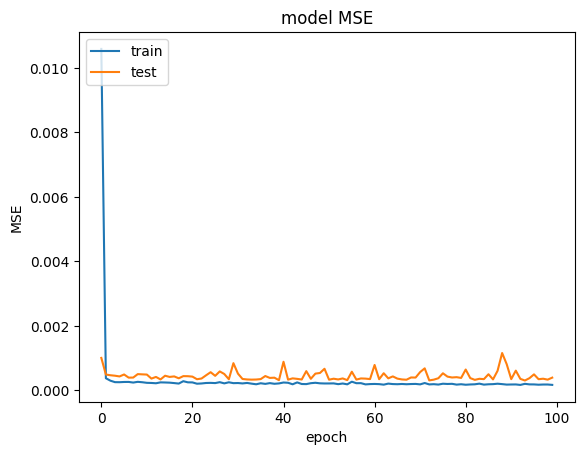

In [ ]:
plotAccuracy(histroy)

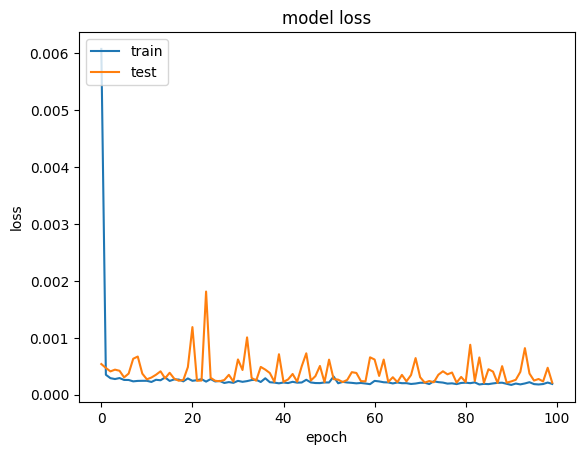

In [ ]:
plotLoss(histroy)

9/9 [==============================] - 0s 3ms/step


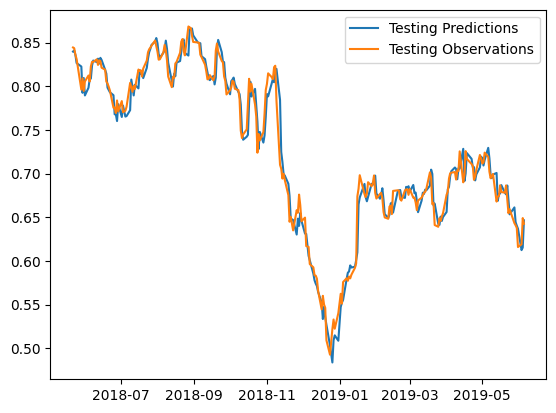

In [ ]:
test_predictions = model.predict(X_val).flatten() #We use .flatten() to make the predictions 1 dimensional. Note that here, we predict on the validation set

plt.plot(dates_val, test_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Testing Predictions', 'Testing Observations'])

10/10 [==============================] - 0s 5ms/step


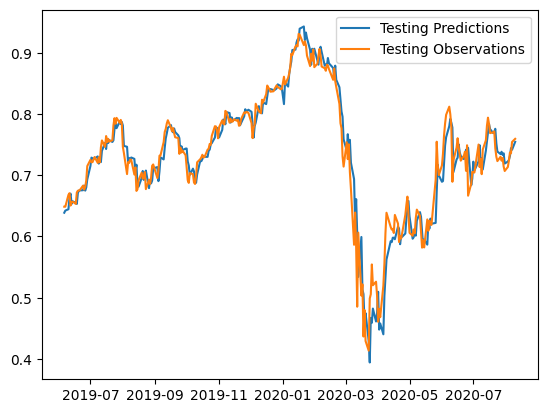

In [ ]:
test_predictions = model.predict(X_test).flatten() #Performing prediction on the test set

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
d=7
def calculate_trend_over_week(prices): #This function calculates our trend predictions over the week.
    trends = []
    price_changes = []
    prices2 = []
    for i in range(0, len(prices), d):
        prices2.append(prices[i])
    prices = prices2
    for i in range(1, len(prices)):
        diff = prices[i] - prices[i - 1]
        percent_change = ((prices[i] - prices[i - 1]) / prices[i - 1]) * 100
        if diff > 0:
            trends.append('Upward')
        elif diff < 0:
            trends.append('Downward')
        else:
            trends.append('No Change')
        price_changes.append(percent_change)
    return trends, price_changes

trendsTest, price_changesTest = calculate_trend_over_week(y_test)
trendsPred, price_changesPred = calculate_trend_over_week(test_predictions)

counter = 0
for i in range(len(trendsTest)): #We compare our prediction of trend with the actual trend in the data. And then, print the ratio of correct trends/total trends
  if trendsTest[i]==trendsPred[i]:
    counter+=1
print(counter/len(trendsTest))

#The trends was found to be correct around 71% of the time over 1 week intervals

0.7171717171717171


In [ ]:
dates_train, X_train, y_train = dates[:q_85], X[:q_85], y[:q_85]

history = model.fit(X_train, y_train, epochs=100) #Here we train again on the data including the validation set. So, training set becomes original training set + validation set.

Epoch 1/100
108/108 [==============================] - 1s 10ms/step - loss: 1.9147e-04 - mean_squared_error: 1.9147e-04
Epoch 2/100
108/108 [==============================] - 1s 9ms/step - loss: 2.1106e-04 - mean_squared_error: 2.1106e-04
Epoch 3/100
108/108 [==============================] - 1s 9ms/step - loss: 2.0569e-04 - mean_squared_error: 2.0569e-04
Epoch 4/100
108/108 [==============================] - 1s 9ms/step - loss: 2.0694e-04 - mean_squared_error: 2.0694e-04
Epoch 5/100
108/108 [==============================] - 1s 8ms/step - loss: 2.0746e-04 - mean_squared_error: 2.0746e-04
Epoch 6/100
108/108 [==============================] - 1s 6ms/step - loss: 1.8954e-04 - mean_squared_error: 1.8954e-04
Epoch 7/100
108/108 [==============================] - 1s 6ms/step - loss: 1.8982e-04 - mean_squared_error: 1.8982e-04
Epoch 8/100
108/108 [==============================] - 1s 6ms/step - loss: 1.7486e-04 - mean_squared_error: 1.7486e-04
Epoch 9/100
108/108 [==========================

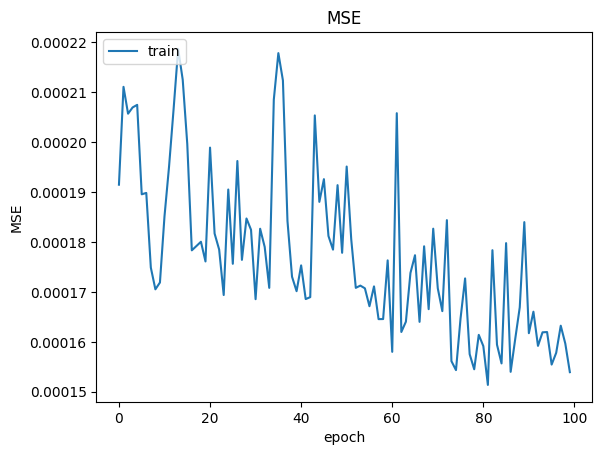

In [ ]:
plt.plot(history.history['mean_squared_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

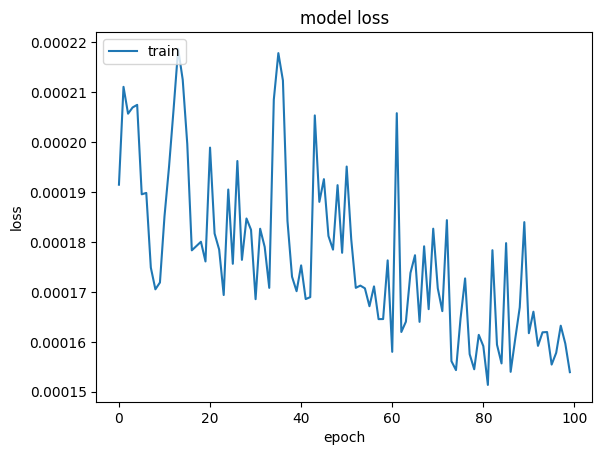

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

10/10 [==============================] - 0s 3ms/step


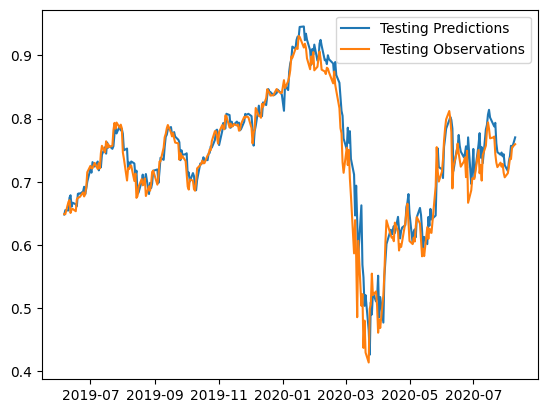

In [ ]:
dates_test, X_test, y_test = dates[q_85:], X[q_85:], y[q_85:]

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
y_test

Date
2019-06-06    0.648632
2019-06-07    0.648632
2019-06-10    0.667984
2019-06-11    0.670696
2019-06-12    0.650471
                ...   
2020-08-04    0.723880
2020-08-05    0.737118
2020-08-06    0.735877
2020-08-07    0.754355
2020-08-10    0.759458
Name: Close(t), Length: 298, dtype: float64

In [ ]:
test_predictions

array([0.6480327 , 0.65492827, 0.6543816 , 0.67471266, 0.67853457,
       0.6604002 , 0.66672546, 0.66426134, 0.6609511 , 0.6807056 ,
       0.6814901 , 0.68075556, 0.6846034 , 0.6919864 , 0.67995954,
       0.68895584, 0.69994056, 0.7203149 , 0.71425897, 0.7310879 ,
       0.72401816, 0.7319745 , 0.71800405, 0.7276655 , 0.72268605,
       0.7427651 , 0.7546938 , 0.7444665 , 0.762007  , 0.7539311 ,
       0.7567479 , 0.7521475 , 0.75638115, 0.77554506, 0.7862553 ,
       0.7764554 , 0.78848827, 0.7813193 , 0.7838753 , 0.7757529 ,
       0.7498026 , 0.7525161 , 0.71922284, 0.7305052 , 0.726805  ,
       0.73208296, 0.728898  , 0.70800585, 0.7175012 , 0.68053645,
       0.68286914, 0.7003664 , 0.71121746, 0.6953771 , 0.7025275 ,
       0.7121538 , 0.6805379 , 0.6981202 , 0.68980247, 0.6972485 ,
       0.71730727, 0.7194335 , 0.6979459 , 0.7161658 , 0.7379547 ,
       0.7346726 , 0.75572383, 0.77143675, 0.7744592 , 0.78295237,
       0.78660005, 0.7752396 , 0.7742552 , 0.77867866, 0.77140

In [ ]:
def calculate_trend_over_week(prices):
    trends = []
    price_changes = []
    prices2 = []
    for i in range(0, len(prices), d):
        prices2.append(prices[i])
    prices = prices2
    for i in range(1, len(prices)):
        diff = prices[i] - prices[i - 1]
        percent_change = ((prices[i] - prices[i - 1]) / prices[i - 1]) * 100
        if diff > 0:
            trends.append('Upward')
        elif diff < 0:
            trends.append('Downward')
        else:
            trends.append('No Change')
        price_changes.append(percent_change)
    return trends, price_changes

trendsTest, price_changesTest = calculate_trend_over_week(y_test)
trendsPred, price_changesPred = calculate_trend_over_week(test_predictions)

counter = 0
for i in range(len(trendsTest)):#Compare predicted trend with expected trend;
  if trendsTest[i]==trendsPred[i]:
    counter+=1
print(counter/len(trendsTest))

#The trends was found to be correct around 75% of the time over 1 week intervals when validation was included in training data.

0.7567567567567568


# **Building an ANN model to compare with LSTM model**

In [ ]:
df.head

<bound method NDFrame.head of                 Open      High       Low  Close(t)    Volume      SD20  \
Date                                                                     
2005-10-17  0.231397  0.235316  0.254396  0.242427  0.033552  0.040653   
2005-10-18  0.233566  0.237940  0.256680  0.242565  0.032175  0.041054   
2005-10-19  0.232412  0.249125  0.254761  0.258239  0.054650  0.041739   
2005-10-20  0.247590  0.252946  0.265860  0.249828  0.075077  0.041852   
2005-10-21  0.246898  0.244936  0.263256  0.249920  0.043375  0.041595   
...              ...       ...       ...       ...       ...       ...   
2020-08-07  0.727130  0.747929  0.740717  0.754355  0.022836  0.181977   
2020-08-10  0.755317  0.756398  0.766248  0.759458  0.017219  0.182491   
2020-08-11  0.769756  0.785445  0.777620  0.767180  0.031326  0.175836   
2020-08-12  0.778890  0.780841  0.771866  0.772098  0.017277  0.160652   
2020-08-13  0.759100  0.763579  0.764649  0.754907  0.015354  0.145824   

       

In [ ]:
def preprocessingHelperANN(df, startDate, endDate, n): #Preprocessing for data of the ANN model.
  L = []
  d3 = startDate - datetime.timedelta(1)
  L.append(df.loc[d3])
  for i in range(1, n):
    L.append(df.loc[dates[i-1]])
  return L

n = len(dates)
X = preprocessingHelperANN(df, dates[0], dates[n-1], n) #Note that in ANN model, we pass features at date t to predict closing price of t+1
X = np.array(X)
print(X)
print(X.shape)
print(y)

[[0.24758961 0.25294605 0.26585979 ... 0.03656863 0.18499642 0.16231916]
 [0.24689763 0.24493648 0.26325645 ... 0.03650057 0.18565703 0.15945536]
 [0.24652858 0.25828577 0.26768669 ... 0.03649708 0.19296064 0.16683569]
 ...
 [0.72570005 0.72956177 0.74327472 ... 0.98007307 0.97845454 0.89784984]
 [0.73414218 0.73637452 0.74701987 ... 0.98397783 0.98634864 0.90591179]
 [0.72713014 0.74792856 0.74071706 ... 0.98763216 0.98713104 0.90793314]]
(3725, 43)
Date
2005-10-21    0.249920
2005-10-24    0.267203
2005-10-25    0.268122
2005-10-26    0.270788
2005-10-27    0.263847
                ...   
2020-08-04    0.723880
2020-08-05    0.737118
2020-08-06    0.735877
2020-08-07    0.754355
2020-08-10    0.759458
Name: Close(t), Length: 3725, dtype: float64


In [ ]:
modelANN = Sequential([layers.Input(len(X[0])), #Building the ANN model.
                    layers.Dense(128, activation='relu'),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(1)])

modelANN.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_squared_error'])

dates_training, X_train, y_train = dates[:q_85], X[:q_85], y[:q_85]
dates_test, X_test, y_test = dates[q_85:], X[q_85:], y[q_85:]

histroy = modelANN.fit(X_train, y_train, epochs=100)

Epoch 1/100
108/108 [==============================] - 1s 3ms/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 2/100
108/108 [==============================] - 0s 3ms/step - loss: 3.7044e-04 - mean_squared_error: 3.7044e-04
Epoch 3/100
108/108 [==============================] - 0s 3ms/step - loss: 3.0934e-04 - mean_squared_error: 3.0934e-04
Epoch 4/100
108/108 [==============================] - 0s 3ms/step - loss: 2.7117e-04 - mean_squared_error: 2.7117e-04
Epoch 5/100
108/108 [==============================] - 0s 3ms/step - loss: 2.5661e-04 - mean_squared_error: 2.5661e-04
Epoch 6/100
108/108 [==============================] - 0s 3ms/step - loss: 2.5919e-04 - mean_squared_error: 2.5919e-04
Epoch 7/100
108/108 [==============================] - 0s 3ms/step - loss: 2.3815e-04 - mean_squared_error: 2.3815e-04
Epoch 8/100
108/108 [==============================] - 0s 3ms/step - loss: 2.3654e-04 - mean_squared_error: 2.3654e-04
Epoch 9/100
108/108 [==============================] - 0

10/10 [==============================] - 0s 2ms/step


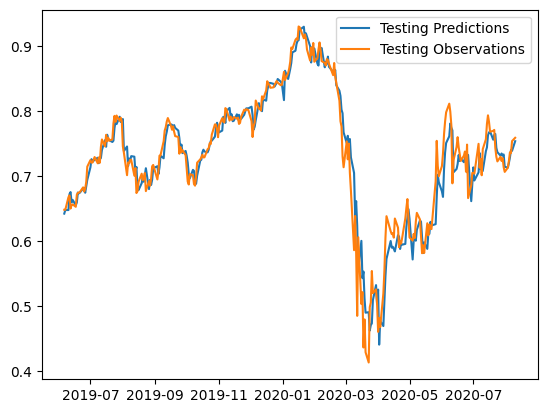

In [ ]:
dates_test, X_test, y_test = dates[q_85:], X[q_85:], y[q_85:]

test_predictions = modelANN.predict(X_test)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
def calculate_trend_over_week(prices):
    trends = []
    price_changes = []
    prices2 = []
    for i in range(0, len(prices), d):
        prices2.append(prices[i])
    prices = prices2
    for i in range(1, len(prices)):
        diff = prices[i] - prices[i - 1]
        percent_change = ((prices[i] - prices[i - 1]) / prices[i - 1]) * 100
        if diff > 0:
            trends.append('Upward')
        elif diff < 0:
            trends.append('Downward')
        else:
            trends.append('No Change')
        price_changes.append(percent_change)
    return trends, price_changes

trendsTest, price_changesTest = calculate_trend_over_week(y_test)
trendsPred, price_changesPred = calculate_trend_over_week(test_predictions)

counter = 0
for i in range(len(trendsTest)):
  if trendsTest[i]==trendsPred[i]:
    counter+=1
print(counter/len(trendsTest))

#The trends are predicted correctly 42% of the time in an ANN over 1 week intervals.

0.42424242424242425


# **Building a CNN model to compare with LSTM model**

In [ ]:
modelCNN = Sequential() #Creating the CNN model

modelCNN.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(43, 1)))
modelCNN.add(layers.MaxPooling1D(pool_size=2))
modelCNN.add(layers.Flatten())
modelCNN.add(layers.Dense(64, activation='relu'))
modelCNN.add(layers.Dense(1, activation='relu'))

#Note that we only used 1 layer of convolution and then added dense layers to complete the CNN

modelCNN.compile(optimizer=Adam(learning_rate = 0.001), loss='mse', metrics=['mean_squared_error'])


histroy = modelCNN.fit(X_train, y_train, epochs=100)

Epoch 1/100
108/108 [==============================] - 2s 4ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 2/100
108/108 [==============================] - 0s 4ms/step - loss: 3.1214e-04 - mean_squared_error: 3.1214e-04
Epoch 3/100
108/108 [==============================] - 0s 4ms/step - loss: 2.4750e-04 - mean_squared_error: 2.4750e-04
Epoch 4/100
108/108 [==============================] - 0s 4ms/step - loss: 2.3746e-04 - mean_squared_error: 2.3746e-04
Epoch 5/100
108/108 [==============================] - 0s 4ms/step - loss: 2.4053e-04 - mean_squared_error: 2.4053e-04
Epoch 6/100
108/108 [==============================] - 0s 4ms/step - loss: 2.2130e-04 - mean_squared_error: 2.2130e-04
Epoch 7/100
108/108 [==============================] - 0s 4ms/step - loss: 2.4879e-04 - mean_squared_error: 2.4879e-04
Epoch 8/100
108/108 [==============================] - 0s 4ms/step - loss: 2.2574e-04 - mean_squared_error: 2.2574e-04
Epoch 9/100
108/108 [==============================] - 0

10/10 [==============================] - 0s 3ms/step


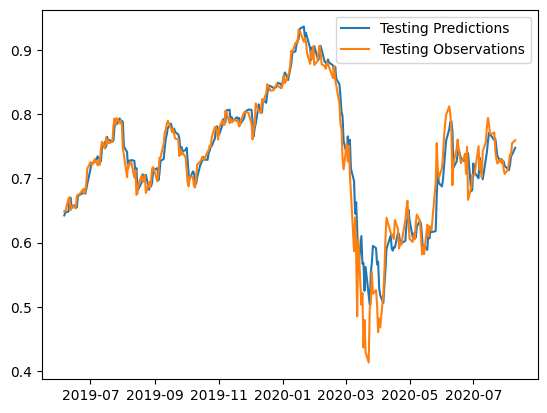

In [ ]:
dates_test, X_test, y_test = dates[q_85:], X[q_85:], y[q_85:]

test_predictions = modelCNN.predict(X_test)

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
def calculate_trend_over_week(prices):
    trends = []
    price_changes = []
    prices2 = []
    for i in range(0, len(prices), d):
        prices2.append(prices[i])
    prices = prices2
    for i in range(1, len(prices)):
        diff = prices[i] - prices[i - 1]
        percent_change = ((prices[i] - prices[i - 1]) / prices[i - 1]) * 100
        if diff > 0:
            trends.append('Upward')
        elif diff < 0:
            trends.append('Downward')
        else:
            trends.append('No Change')
        price_changes.append(percent_change)
    return trends, price_changes

trendsTest, price_changesTest = calculate_trend_over_week(y_test)
trendsPred, price_changesPred = calculate_trend_over_week(test_predictions)

counter = 0
for i in range(len(trendsTest)):
  if trendsTest[i]==trendsPred[i]:
    counter+=1
print(counter/len(trendsTest))

#The trends was found to be correct around 44% of the time in a CNN over 1 week intervals.

0.44107744107744107
